In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tab2img.converter import Tab2Img
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,roc_curve, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay,precision_score, recall_score, RocCurveDisplay

In [3]:
df = pd.read_parquet("processed_data/agg_data_preprocess_2.gzip")
target = pd.read_feather("train_labels.ftr")["target"]

In [6]:
agg_to_have = ["mean", "min", "max"]
columns_to_have = []

for col in df.columns:
    for agg in agg_to_have:
        if agg in col:
            columns_to_have.append(col)

len(columns_to_have)

462

In [10]:
df = df[columns_to_have]
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [12]:
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer


median_imputer = MeanMedianImputer(imputation_method='median')
median_imputer.fit(X_train)
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [17]:
converter = Tab2Img()
images = converter.fit_transform(X_train.values, y_train.values)

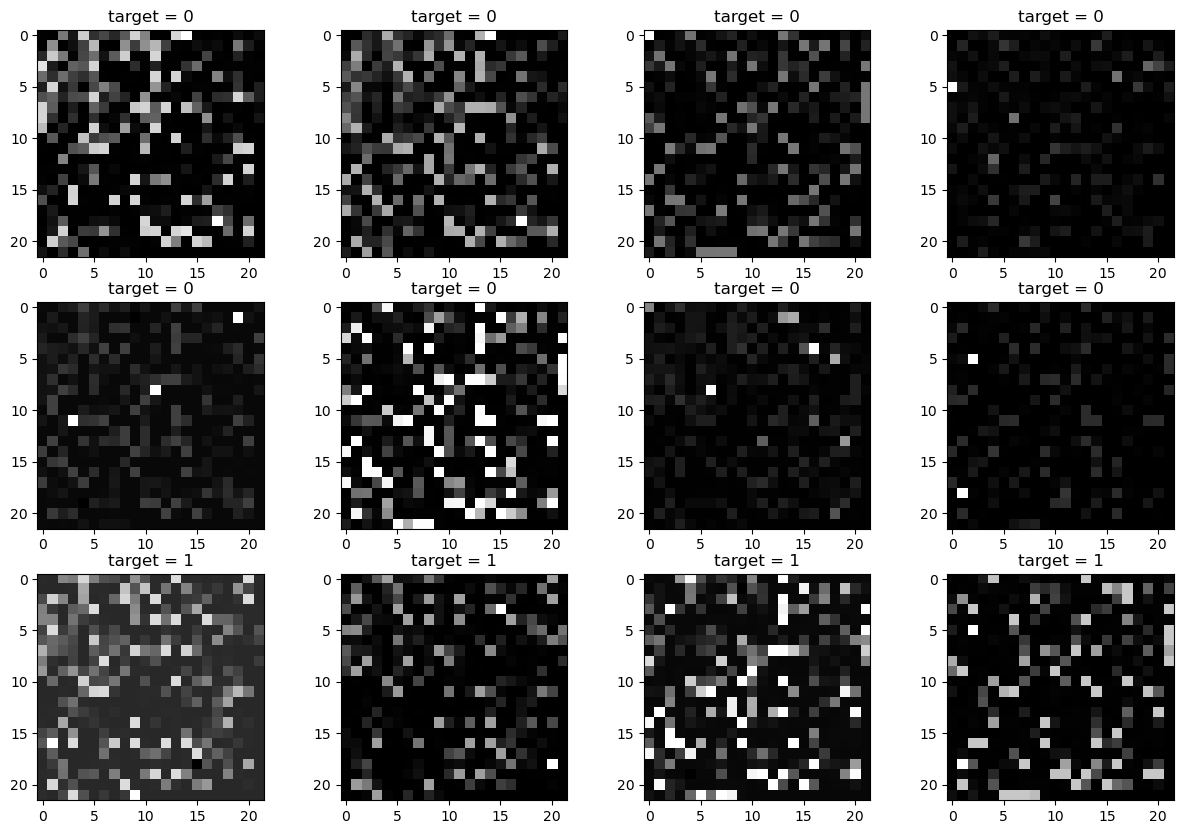

In [18]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()
for i in range(12):
    ax[i].title.set_text(f"target = {target[i]}")
    ax[i].imshow(images[i], cmap = "gray")

plt.show()